# Imports

In [24]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils.data.dataloader as dataloader
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)

# Transformations

In [12]:
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4), # Randomly crop the image to 32x32
    transforms.RandomHorizontalFlip(p=0.5), # Randomly flip the image horizontally each time you pull it with a 50% chance
    transforms.ToTensor(), # Convert image to tensor and scale to 0, 1
    transforms.Normalize([0.49139968, 0.48215827, 0.44653124],
                         [0.24703233, 0.24348505, 0.26158768]) # Normalize to mean and std of training set
])

# Typically with validation and testing sets, you don't apply any augmentation to keep it as close to real-world data as possible
test_transform = transforms.Compose([
    transforms.ToTensor(), # Convert image to tensor and scale to 0, 1
    transforms.Normalize([0.49139968, 0.48215827, 0.44653124],
                         [0.24703233, 0.24348505, 0.26158768]) # Normalize to mean and std of training set
])

# CIFAR10 Loading

60,000 sized dataset of images belonging to 10 classes. The 10 classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.  

In [15]:
dataset_train = datasets.CIFAR10(root='./data', train=True, transform=train_transform, download=True)
dataset_test = datasets.CIFAR10(root='./data', train=False, transform=test_transform, download=True)

print(len(dataset_train))
print(len(dataset_test))

50000
10000


In [16]:
dataloader_train = dataloader.DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=4)
dataloader_test = dataloader.DataLoader(dataset_test, batch_size=128, shuffle=False, num_workers=4)

# Sanity Check

In [17]:
for X, y in dataloader_train:
    print(X.shape)
    print(y.shape)
    break

torch.Size([128, 3, 32, 32])
torch.Size([128])


# Visualize

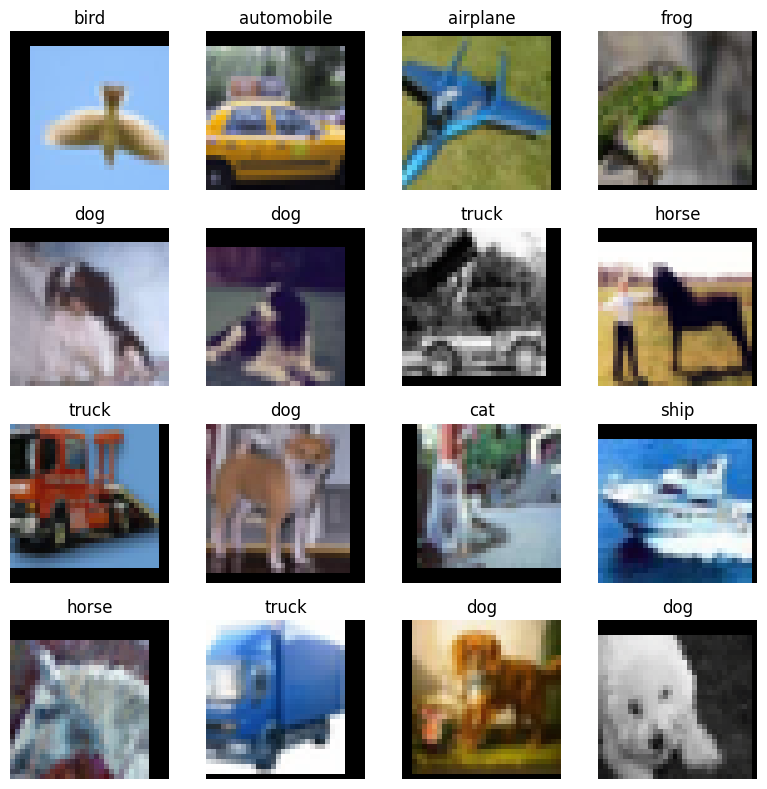

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = dataset_train.classes

# Get one batch
images, labels = next(iter(dataloader_train))

# Denormalize images for display
mean = np.array([0.49139968, 0.48215827, 0.44653124])
std = np.array([0.24703233, 0.24348505, 0.26158768])

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i in range(16):
    ax = axes[i//4, i%4]
    img = images[i].numpy().transpose((1, 2, 0))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    ax.imshow(img)
    ax.set_title(classes[labels[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()